In [1]:
# 한글 폰트를 구글 코랩에서 설치하기 위한 과정
# 런타임(세션) 다시 시작을 한 후에는 이 박스의 코드는 다시 실행하지 말고 아래의 박스부터 코드를 진행함

!apt-get update &> /dev/null
!pip install --upgrade pip

!apt -qq -y install fonts-nanum > /dev/null #  나눔폰트 설치 (한글 출력용)
!apt-get -qq install ttf-mscorefonts-installer > /dev/null # MS 기본 글꼴 설치
!sudo fc-cache -fv > /dev/null   #  폰트 캐시 초기화
!rm ~/.cache/matplotlib -rf > /dev/null  #  matplotlib 폰트 캐시 삭제

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 743.0 kB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2




In [ ]:
!pip install kiwipiepy -q

import pandas as pd
import numpy as np
from collections import Counter
import re
from kiwipiepy import Kiwi

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from google.colab import drive
drive.mount('/content/drive')

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'     #  나눔바른고딕 폰트 파일 경로 지정
font = fm.FontProperties(fname=fontpath, size=15)  #  해당 폰트를 matplotlib에 적용할 객체 생성
plt.rc('font', family='NanumBarunGothic')  #  전체 matplotlib 폰트를 나눔바른고딕으로 설정
%config InlineBackend.figure_format = 'retina'   #  시각화 이미지 품질을 'retina'로 설정하여 선명하게 출력

%matplotlib inline  #  matplotlib 결과를 Jupyter/Colab 노트북에 바로 출력

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


UsageError: unrecognized arguments: # matplotlib 결과를 Jupyter/Colab 노트북에 바로 출력


# 각 신문사별 데이터 합치기 및 전처리
* 본 코드 파일에서는 아래 박스부터 여러분들의 환경에 맞게 수정해야만 코드가 진행가능

In [ ]:
## 아래 사항들은 파일 경로, 신문사명, 신문사 성향 등 본인의 파일에 맞게 수정 필요

## 각 신문사 데이터프레임 읽기
df1 = pd.read_csv('/content/drive/MyDrive/Colab/newspaper1.csv', encoding='utf-8', lineterminator='\n')
df2 = pd.read_csv('/content/drive/MyDrive/Colab/newspaper2.csv', encoding='utf-8', lineterminator='\n')
df3 = pd.read_csv('/content/drive/MyDrive/Colab/newspaper3.csv', encoding='utf-8', lineterminator='\n')
df4 = pd.read_csv('/content/drive/MyDrive/Colab/newspaper4.csv', encoding='utf-8', lineterminator='\n')

## 각 데이터프레임에 신문사 이름과 성향을 확인할 수 있는 column 추가하기
df1['News'] = '신문사1'
df2['News'] = '신문사2'
df3['News'] = '신문사3'
df4['News'] = '신문사4'

df1['Style'] = '진보'
df1['Style'] = '보수'
df1['Style'] = '보수'
df1['Style'] = '진보'

## 전체 데이터프레임 합치기
df = pd.concat([df1, df2, df3, df4])
df['Year'] = df['Date'].str[:4] # 연도 데이터 칼럼 추가
df['YearMonth'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y%m') # yyyy-mm-dd 혹은 yyyy.mm.dd 형태의 날짜 데이터를 yyyymm 형태로 변환해서 칼럼 추가

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab/공정성/df100_final.csv', encoding='utf-8', lineterminator='\n')

df

,Date,Url,Title,Content,News,Style,Year,Char,Nouns
0,2022. 12. 31,https://www.khan.co.kr/article/202212311200001,[신년사]이원석 검찰총장 “국민 믿음 얻으려면 공정성과 정치적 중립 중요”,이원석 검찰총장은 2023년 새해를 맞아 “우리는 ‘옳은 일’을 ‘옳은 방법’으로 ...,경향,진보,2022,140,이원석 검찰총장 새해 방법 사람 검찰 국민 믿음 공정성 정치 중립 중요 총장 신년사...
1,2022. 12. 29,https://www.khan.co.kr/article/202212291223001,광주시 ‘신세계 그랜드 스타필드 광주’ 복합쇼핑몰 사업계획서 공개,광주광역시는 신세계프라퍼티가 제출한 ‘그랜드 스타필드 광주’ 복합쇼핑몰 사업계획서 ...,경향,진보,2022,174,광주광역시 신세계프라 퍼티 제출 그랜드 스타 필드 광주 복합 쇼핑몰 사업계획서 원본...
2,2022. 12. 29,https://www.khan.co.kr/article/202212291314001,"국민의힘, 당협위원장에 윤 대통령 인연 검사 대거 발탁",국민의힘이 29일 당원협의회(당협) 42곳의 조직위원장 인선을 확정했다. 친이준석계...,경향,진보,2022,416,국민의힘 당원협의회 당협 조직위원장 인선 확정 이준석 의원 탈락 윤석열 대통령 인연...
3,2022. 12. 29,https://www.khan.co.kr/article/202212291611001,"이재명, 김근태 추모미사 참석해 “민주주의 사방에서 무너지고 있다”",이재명 더불어민주당 대표가 29일 김근태 전 열린우리당 의장 11주기 추모미사에 참...,경향,진보,2022,225,이재명 더불어민주당 대표 김근태 열린우리당 의장 추모 미사 참석 의장 희생 고통 민...
4,2022. 12. 28,https://www.khan.co.kr/article/202212281056001,"검찰, ‘TV조선 재승인 감점 의혹’ 방통위 3번째 압수수색",방송통신위원회(방통위)가 2020년 종합편성채널 TV조선 재승인 심사 과정에서 점수...,경향,진보,2022,127,방송 통신 위원회 방통위 종합 편성 채널 TV조선 승인 심사 과정 점수 고의 의혹 ...
...,...,...,...,...,...,...,...,...,...
27067,2005-01-11,https://www.donga.com/news/article/all/2005011...,"외교부 “추적 60분, 정부 지진피해 대응 왜곡”",외교통상부는 11일 ‘실종 한국인 어디에...,동아,보수,2005,141,외교 통상부 실종 한국인 제목 방영 시사 프로그램 추적 남아시아 지진 해일 피해 정...
27068,2005-01-10,https://www.donga.com/news/article/all/2005011...,MBC “사실은 새 비평프로 방영합니다”,진행자와 기자의 외제 명품 핸드백 수수로 물의를 빚은 MBC ‘신강균의 뉴스서비스 ...,동아,보수,2005,156,진행자 기자 외제 명품 핸드백 수수 물의 신강 뉴스 서비스 사실 폐지 매체 비평 프...
27069,2005-01-06,https://www.donga.com/news/article/all/2005010...,방송광고 총량제-중간광고 무엇이 문제인가,정동채(鄭東采) 문화관광부 장관이 5일 ...,동아,보수,2005,430,정동채 문화 관광부 장관 광고인 신년교례회에서 방송 광고 총량 도입 중간 광고 허용...
27070,2005-01-06,https://www.donga.com/news/article/all/2005010...,정부혁신 최우수기관에 관세청,참여정부가 중점을 두고 추진해온 정부혁신...,동아,보수,2005,163,참여 정부 중점 추진 정부 혁신 활동 중앙 행정 부처 종합 평가 결과 관세청 우수 ...


In [ ]:
# 띄어쓰기로 되어있는 합성명사를 쉼표 없는 한 단어로 처리(Tokenizing 방지)
# 자신의 케이스를 고려하여 어떤 단어를 합치고 고유명사로 지정해야 하는지 고민 필요

df['Content'] = df['Content'].str.replace('개인\s*정보', '개인정보', regex=True)
df['Content'] = df['Content'].str.replace('개인\s*정보\s*보호법', '개인정보보호법', regex=True)
df['Content'] = df['Content'].str.replace('검찰\s*총장', '검찰총장', regex=True)
df['Content'] = df['Content'].str.replace('고위\s*공직자\s*범죄\s*수사처', '고위공직자범죄수사처', regex=True)
df['Content'] = df['Content'].str.replace('고충\s*심의\s*위원회', '고충심의위원회', regex=True)
df['Content'] = df['Content'].str.replace('공정\s*거래\s*위원회', '공정거래위원회', regex=True)
df['Content'] = df['Content'].str.replace('공직\s*선거법', '공직선거법', regex=True)
df['Content'] = df['Content'].str.replace('국민\s*권익\s*위원회', '국민권익위원회', regex=True)
df['Content'] = df['Content'].str.replace('국민\s*체육\s*진흥\s*공단', '국민체육진흥공단', regex=True)
df['Content'] = df['Content'].str.replace('국방\s*위원회', '국방위원회', regex=True)
df['Content'] = df['Content'].str.replace('국회\s*문화\s*체육\s*관광\s*위원회', '국회문화체육관광위원회', regex=True)
df['Content'] = df['Content'].str.replace('기자\s*회견', '기자회견', regex=True)

df['Content'] = df['Content'].str.replace('노무현\s*정부', '노무현정부', regex=True)

df['Content'] = df['Content'].str.replace('대학\s*수학\s*능력\s*시험', '대학수학능력시험', regex=True)

df['Content'] = df['Content'].str.replace('문재인\s*정부', '문재인정부', regex=True)
df['Content'] = df['Content'].str.replace('문화\s*체육\s*관광부', '문화체육관광부', regex=True)
df['Content'] = df['Content'].str.replace('문화\s*관광부', '문화관광부', regex=True)

df['Content'] = df['Content'].str.replace('방송\s*통신\s*위원회', '방송통신위원회', regex=True)
df['Content'] = df['Content'].str.replace('방송\s*통신\s*심의\s*위원회', '방송통신심의위원회', regex=True)
df['Content'] = df['Content'].str.replace('법률\s*자문\s*위원회', '법률자문위원회', regex=True)

df['Content'] = df['Content'].str.replace('선거\s*관리\s*위원회', '선거관리위원회', regex=True)
df['Content'] = df['Content'].str.replace('선거\s*방송\s*심의\s*위원회', '선거방송심의위원회', regex=True)

df['Content'] = df['Content'].str.replace('중앙\s*지검', '중앙지검', regex=True)
df['Content'] = df['Content'].str.replace('지방\s*선거', '지방선거', regex=True)

df['Content'] = df['Content'].str.replace('참여\s*정부', '참여정부', regex=True)

df['Content'] = df['Content'].str.replace('특정\s*경제\s*범죄\s*가중\s*처벌\s*법률', '특정경제범죄가중처벌법률', regex=True)

df['Content'] = df['Content'].str.replace('한국\s*프로\s*스포츠\s*협회', '한국프로스포츠협회', regex=True)

#####################################

# kiwipiepy 에서 해당 명사를 고유명사로 인식하도록 처리
kiwi = Kiwi(model_type='sbg')

kiwi.add_user_word('개인정보보호법', 'NNP', 2) # NNP: 고유명사 / NNG: 일반명사, 숫자: 우선수위: 일반적으로 2 이상이면 분할하지 않고 한 단어로 처리
kiwi.add_user_word('검찰총장', 'NNP', 2)
kiwi.add_user_word('고위공직자범죄수사처', 'NNP', 2)
kiwi.add_user_word('고충심의위원회', 'NNP', 2)
kiwi.add_user_word('공정성', 'NNG', 2)
kiwi.add_user_word('공직선거법', 'NNP', 2)
kiwi.add_user_word('국민의힘', 'NNP', 2)
kiwi.add_user_word('국민통합위원회', 'NNP', 2)
kiwi.add_user_word('국회문화체육관광위원회', 'NNP', 2)
kiwi.add_user_word('기자회견', 'NNG', 2)

kiwi.add_user_word('노무현정부', 'NNP', 2)

kiwi.add_user_word('당원협의회', 'NNP', 2)
kiwi.add_user_word('당협위원장', 'NNP', 2)
kiwi.add_user_word('대학수학능력시험', 'NNP', 2)

kiwi.add_user_word('문재인정부', 'NNP', 2)
kiwi.add_user_word('문화체육관광부', 'NNP', 2)

kiwi.add_user_word('방송통신심의위원회', 'NNP', 2)
kiwi.add_user_word('방송통신위원회', 'NNP', 2)
kiwi.add_user_word('법률자문위원회', 'NNP', 2)
kiwi.add_user_word('비상대책위원회', 'NNP', 2)

kiwi.add_user_word('선거관리위원회', 'NNP', 2)
kiwi.add_user_word('선거방송심의위원회', 'NNP', 2)

kiwi.add_user_word('정경심', 'NNP', 2)
kiwi.add_user_word('조직위원장', 'NNP', 2)
kiwi.add_user_word('지방선거', 'NNG', 2)

kiwi.add_user_word('참여정부', 'NNG', 2)

kiwi.add_user_word('특정경제범죄가중처벌법률', 'NNP', 2)

kiwi.add_user_word('한국프로스포츠협회', 'NNP', 2)

True

In [ ]:
# 형태소 추출 테스트

results = kiwi.analyze(df['Content'][27070])
extracted_morphs = []
for result in results:
    for morphtag in result[0]:  # 각 형태소/태그 쌍에 대해 반복
        morph = morphtag[0]  # 형태소와 태그 언패킹
        tag = morphtag[1]
        if tag in ('NNG', 'NNP') and len(morph) >= 2: # 두 글자 이상의 일반명사, 고유명사만 추출
            extracted_morphs.append(morph)

' '.join(extracted_morphs) # tokenized 된 텍스트를 원래대로 하나의 텍스트로 처리

'참여정부 중점 추진 정부 혁신 활동 중앙 행정 부처 종합 평가 결과 관세청 우수 기관 행정 자치부 지난해 국무총리 비서실 중앙 행정 기관 위원회 대상 전략 종합 혁신 능력 혁신 관리 역량 정부 혁신 과제 분야 실시 결과 평가 이번 평가 관세청 혁신 방향 설정 혁신 인프라 물류 시스템 통관 시간 종전 단축 성과 평가 최고 점수 관세청 조달청 국세청 기획 예산처 중앙 인사 위원회 기관 혁신 활동 체질 단계 선도 그룹 평가 반면 금융 감독 위원회 민주 평화 통일 정책 자문 위원회 청소년 보호 위원회 외교 통상부 비상 기획 위원회 기관 혁신 근본 정립 필요 하위 부처 그룹 평가 교육 자원부 문화체육관광부 행정 자치 환경 정보 통신부 산업 자원부 해양 수산 기관 추격 그룹 혁신 활동 성과 시작 기관 판정 반면 재정 경제 통일부 보건 복지 건설 교통부 여성 기관 혁신 활동 성과 미흡 평가 행정 자치 관계자 이번 평가 객관 공정 외부 인사 평가단 구성 평가 공무원 성과 상여금 지급 부서 평가 결과 개인 평가 반영 방침 하종 대기자'

In [ ]:
# 형태소 분석 및 품사 태깅 실행
# 상당히 오래 걸림

def extract_morphs(text):
    results = kiwi.analyze(text)
    extracted_morphs = []
    for result in results:
        for morphtag in result[0]:  # 각 형태소/태그 쌍에 대해 반복
            morph = morphtag[0]  # 형태소와 태그 언패킹
            tag = morphtag[1]
            if tag in ('NNG', 'NNP') and len(morph) >= 2:
                extracted_morphs.append(morph)

    return ' '.join(extracted_morphs)

# 각 텍스트에 대해 형태소 추출
morphs_list = [extract_morphs(text) for text in df['Content']]
df['Nouns'] = morphs_list

df

,Date,Url,Title,Content,News,Style,Year,Char,Nouns
0,2022. 12. 31,https://www.khan.co.kr/article/202212311200001,[신년사]이원석 검찰총장 “국민 믿음 얻으려면 공정성과 정치적 중립 중요”,이원석 검찰총장은 2023년 새해를 맞아 “우리는 ‘옳은 일’을 ‘옳은 방법’으로 ...,경향,진보,2022,140,이원석 검찰총장 새해 방법 사람 검찰 국민 믿음 공정성 정치 중립 중요 총장 신년사...
1,2022. 12. 29,https://www.khan.co.kr/article/202212291223001,광주시 ‘신세계 그랜드 스타필드 광주’ 복합쇼핑몰 사업계획서 공개,광주광역시는 신세계프라퍼티가 제출한 ‘그랜드 스타필드 광주’ 복합쇼핑몰 사업계획서 ...,경향,진보,2022,174,광주광역시 신세계프라 퍼티 제출 그랜드 스타 필드 광주 복합 쇼핑몰 사업계획서 원본...
2,2022. 12. 29,https://www.khan.co.kr/article/202212291314001,"국민의힘, 당협위원장에 윤 대통령 인연 검사 대거 발탁",국민의힘이 29일 당원협의회(당협) 42곳의 조직위원장 인선을 확정했다. 친이준석계...,경향,진보,2022,416,국민의힘 당원협의회 당협 조직위원장 인선 확정 이준석 의원 탈락 윤석열 대통령 인연...
3,2022. 12. 29,https://www.khan.co.kr/article/202212291611001,"이재명, 김근태 추모미사 참석해 “민주주의 사방에서 무너지고 있다”",이재명 더불어민주당 대표가 29일 김근태 전 열린우리당 의장 11주기 추모미사에 참...,경향,진보,2022,225,이재명 더불어민주당 대표 김근태 열린우리당 의장 추모 미사 참석 의장 희생 고통 민...
4,2022. 12. 28,https://www.khan.co.kr/article/202212281056001,"검찰, ‘TV조선 재승인 감점 의혹’ 방통위 3번째 압수수색",방송통신위원회(방통위)가 2020년 종합편성채널 TV조선 재승인 심사 과정에서 점수...,경향,진보,2022,127,방송통신위원회 방통위 종합 편성 채널 TV조선 승인 심사 과정 점수 고의 의혹 관련...
...,...,...,...,...,...,...,...,...,...
27067,2005-01-11,https://www.donga.com/news/article/all/2005011...,"외교부 “추적 60분, 정부 지진피해 대응 왜곡”",외교통상부는 11일 ‘실종 한국인 어디에...,동아,보수,2005,141,외교 통상부 실종 한국인 제목 방영 시사 프로그램 추적 남아시아 지진 해일 피해 정...
27068,2005-01-10,https://www.donga.com/news/article/all/2005011...,MBC “사실은 새 비평프로 방영합니다”,진행자와 기자의 외제 명품 핸드백 수수로 물의를 빚은 MBC ‘신강균의 뉴스서비스 ...,동아,보수,2005,156,진행자 기자 외제 명품 핸드백 수수 물의 신강 뉴스 서비스 사실 폐지 매체 비평 프...
27069,2005-01-06,https://www.donga.com/news/article/all/2005010...,방송광고 총량제-중간광고 무엇이 문제인가,정동채(鄭東采) 문화체육관광부 장관이 5...,동아,보수,2005,430,정동채 문화체육관광부 장관 광고인 신년교례회에서 방송 광고 총량 도입 중간 광고 허...
27070,2005-01-06,https://www.donga.com/news/article/all/2005010...,정부혁신 최우수기관에 관세청,참여정부가 중점을 두고 추진해온 정부혁신...,동아,보수,2005,163,참여정부 중점 추진 정부 혁신 활동 중앙 행정 부처 종합 평가 결과 관세청 우수 기...


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab/공정성/df_final.csv', encoding = 'utf-8-sig',
          index_label = False, index = False)

# 추가적인 필터링 및 기술통계

In [ ]:
# 아래 단계는 연구자의 주관이 강하게 반영된 과정: 기사가 일정 단어 개수를 충족하지 못하면 분석 자료에서 제외
# 이후의 단계는 본 박스의 진행이 반영된 상태에서 진행

# 띄어쓰기 단위로 단어 개수 확인
df['Char'] = df.Nouns.str.count(' ') + 1
idx_one = df[df['Char'] < 100].index # 100개 미만의 단어로 구성된 기사는 분석 대상에서 제외
df1 = df.drop(idx_one) # 별도의 데이터프레임으로 저장

df1.to_csv('/content/drive/MyDrive/Colab/공정성/df100_final.csv', encoding = 'utf-8-sig',
           index_label = False, index = False)

print(len(df1))
df1.head()

27071


,Date,Url,Title,Content,News,Style,Year,Char,Nouns
0,2022. 12. 31,https://www.khan.co.kr/article/202212311200001,[신년사]이원석 검찰총장 “국민 믿음 얻으려면 공정성과 정치적 중립 중요”,이원석 검찰총장은 2023년 새해를 맞아 “우리는 ‘옳은 일’을 ‘옳은 방법’으로 ...,경향,진보,2022,140,이원석 검찰총장 새해 방법 사람 검찰 국민 믿음 공정성 정치 중립 중요 총장 신년사...
1,2022. 12. 29,https://www.khan.co.kr/article/202212291223001,광주시 ‘신세계 그랜드 스타필드 광주’ 복합쇼핑몰 사업계획서 공개,광주광역시는 신세계프라퍼티가 제출한 ‘그랜드 스타필드 광주’ 복합쇼핑몰 사업계획서 ...,경향,진보,2022,174,광주광역시 신세계프라 퍼티 제출 그랜드 스타 필드 광주 복합 쇼핑몰 사업계획서 원본...
2,2022. 12. 29,https://www.khan.co.kr/article/202212291314001,"국민의힘, 당협위원장에 윤 대통령 인연 검사 대거 발탁",국민의힘이 29일 당원협의회(당협) 42곳의 조직위원장 인선을 확정했다. 친이준석계...,경향,진보,2022,415,국민의힘 당원협의회 당협 조직위원장 인선 확정 이준석 의원 탈락 윤석열 대통령 인연...
3,2022. 12. 29,https://www.khan.co.kr/article/202212291611001,"이재명, 김근태 추모미사 참석해 “민주주의 사방에서 무너지고 있다”",이재명 더불어민주당 대표가 29일 김근태 전 열린우리당 의장 11주기 추모미사에 참...,경향,진보,2022,225,이재명 더불어민주당 대표 김근태 열린우리당 의장 추모 미사 참석 의장 희생 고통 민...
4,2022. 12. 28,https://www.khan.co.kr/article/202212281056001,"검찰, ‘TV조선 재승인 감점 의혹’ 방통위 3번째 압수수색",방송통신위원회(방통위)가 2020년 종합편성채널 TV조선 재승인 심사 과정에서 점수...,경향,진보,2022,125,방송통신위원회 방통위 종합 편성 채널 TV조선 승인 심사 과정 점수 고의 의혹 관련...


In [ ]:
# 평균 ± 2*표준편차를 기준으로 데이터 필터링 가능(예시)
# 위의 100개를 기준으로 하거나 아래의 표준편차를 기준으로 하거나 둘 중 하나만 선택해서 진행할 것

df1['Char'] = df1.Nouns.str.count(' ') + 1

mean = df1['Char'].mean()
std = df1['Char'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

filtered_df = df1[(df1['Char'] >= lower_bound) & (df1['Char'] <= upper_bound)]
filtered_df

,Date,Url,Title,Content,News,Style,Year,Char,Nouns
0,2022. 12. 31,https://www.khan.co.kr/article/202212311200001,[신년사]이원석 검찰총장 “국민 믿음 얻으려면 공정성과 정치적 중립 중요”,이원석 검찰총장은 2023년 새해를 맞아 “우리는 ‘옳은 일’을 ‘옳은 방법’으로 ...,경향,진보,2022,142,이원석 검찰 총장 새해 방법 사람 검찰 국민 믿음 공정성 정치 중립 중요 총장 신년...
1,2022. 12. 29,https://www.khan.co.kr/article/202212291223001,광주시 ‘신세계 그랜드 스타필드 광주’ 복합쇼핑몰 사업계획서 공개,광주광역시는 신세계프라퍼티가 제출한 ‘그랜드 스타필드 광주’ 복합쇼핑몰 사업계획서 ...,경향,진보,2022,174,광주광역시 신세계프라 퍼티 제출 그랜드 스타 필드 광주 복합 쇼핑몰 사업계획서 원본...
2,2022. 12. 29,https://www.khan.co.kr/article/202212291314001,"국민의힘, 당협위원장에 윤 대통령 인연 검사 대거 발탁",국민의힘이 29일 당원협의회(당협) 42곳의 조직위원장 인선을 확정했다. 친이준석계...,경향,진보,2022,419,국민의힘 당원협의회 당협 조직위원장 인선 확정 이준석 의원 탈락 윤석열 대통령 인연...
3,2022. 12. 29,https://www.khan.co.kr/article/202212291611001,"이재명, 김근태 추모미사 참석해 “민주주의 사방에서 무너지고 있다”",이재명 더불어민주당 대표가 29일 김근태 전 열린우리당 의장 11주기 추모미사에 참...,경향,진보,2022,226,이재명 더불어민주당 대표 김근태 열린우리당 의장 주기 추모 미사 참석 의장 희생 고...
4,2022. 12. 28,https://www.khan.co.kr/article/202212281056001,"검찰, ‘TV조선 재승인 감점 의혹’ 방통위 3번째 압수수색",방송통신위원회(방통위)가 2020년 종합편성채널 TV조선 재승인 심사 과정에서 점수...,경향,진보,2022,127,방송 통신 위원회 방통위 종합 편성 채널 TV조선 승인 심사 과정 점수 고의 의혹 ...
...,...,...,...,...,...,...,...,...,...
27080,2005-01-11,https://www.donga.com/news/article/all/2005011...,"외교부 “추적 60분, 정부 지진피해 대응 왜곡”",외교통상부는 11일 ‘실종 한국인 어디에...,동아,보수,2005,141,외교 통상부 실종 한국인 제목 방영 시사 프로그램 추적 남아시아 지진 해일 피해 정...
27081,2005-01-10,https://www.donga.com/news/article/all/2005011...,MBC “사실은 새 비평프로 방영합니다”,진행자와 기자의 외제 명품 핸드백 수수로 물의를 빚은 MBC ‘신강균의 뉴스서비스 ...,동아,보수,2005,156,진행자 기자 외제 명품 핸드백 수수 물의 신강 뉴스 서비스 사실 폐지 매체 비평 프...
27082,2005-01-06,https://www.donga.com/news/article/all/2005010...,방송광고 총량제-중간광고 무엇이 문제인가,정동채(鄭東采) 문화관광부 장관이 5일 ...,동아,보수,2005,430,정동채 문화 관광부 장관 광고인 신년교례회에서 방송 광고 총량 도입 중간 광고 허용...
27083,2005-01-06,https://www.donga.com/news/article/all/2005010...,정부혁신 최우수기관에 관세청,참여정부가 중점을 두고 추진해온 정부혁신...,동아,보수,2005,164,참여 정부 중점 추진 정부 혁신 활동 중앙 행정 부처 종합 평가 결과 관세청 우수 ...


In [ ]:
# 데이터프레임의 'Nouns' 칼럼에서 각 텍스트를 처리
wordlist = []
for text in df1['Nouns']:
    tokens = text.split() # split 메서드를 사용하여 텍스트를 공백 기준으로 분리
    wordlist.extend(tokens)

# 단어의 빈도 계산
count = Counter(wordlist)
words = dict(count.most_common(100))
print(words)

{'수사': 36590, '문제': 33848, '공정성': 32757, '검찰': 32097, '대통령': 30837, '방송': 29559, '국민': 27849, '정부': 27789, '사회': 26696, '평가': 26657, '의원': 26548, '대표': 26198, '관련': 24929, '조사': 24715, '후보': 24329, '정치': 23556, '사건': 23308, '기자': 22888, '공정': 22863, '위원회': 21251, '교육': 19483, '결과': 19111, '선거': 18619, '사람': 18113, '위원': 17959, '인사': 17463, '국회': 17409, '장관': 17400, '과정': 17378, '경우': 17368, '대학': 17217, '사실': 16285, '주장': 16190, '필요': 16102, '제도': 16009, '결정': 15890, '생각': 15755, '언론': 15741, '정책': 15644, '가능': 15425, '교수': 15345, '한국': 14924, '서울': 14678, '경제': 14625, '이번': 14530, '보도': 14490, '검사': 14378, '국가': 14329, '이날': 14295, '논란': 14128, '내용': 13893, '의혹': 13828, '법원': 13806, '기업': 13568, '지적': 13357, '상황': 13090, '진행': 12893, '기관': 12723, '공개': 12650, '비판': 12496, '요구': 12255, '학생': 12216, '대상': 11948, '지원': 11925, '시장': 11914, '이상': 11909, '사장': 11807, '심사': 11772, '혐의': 11610, '의견': 11558, '위원장': 11540, '이유': 11358, '참여': 11105, '지역': 11005, '자신': 10995, '입장': 10983, '개혁': 1

In [ ]:
stoplist = ['가능', '결과', '경우', '과정', '관계자', '관련', '기자',
            '내용',
            '당시', '때문',
            '문제',
            '보도',
            '사건', '사람', '사실', '생각', '시간',
            '의견', '이날', '이번', '이상', '이유', '이후',
            '자신', '지난해',
            '필요']

# 한글/영문/숫자를 단어 경계로 보는 커스텀 경계
B = r"[가-힣A-Za-z0-9]" #  단어 경계를 정의하는 문자 클래스 (한글, 영문자, 숫자 포함)
words = "|".join(map(re.escape, stoplist)) #  stoplist에 있는 단어들을 '|'로 연결한 정규표현식 문자열로 변환 (특수문자 이스케이프 처리 포함)
pattern = rf"(?<!{B})(?:{words})(?!{B})"   # 정확히 그 '단어'일 때만 매칭

filtered_df["Content"] = filtered_df["Content"].str.replace(pattern, "", regex=True)

In [ ]:
# 위의  표준편차를 기준으로 필터링한 데이터를 쓰고 싶은 경우 저장
# 이후 이 데이터프레임으로 진행하길 원할 경우 이후 코드에서 데이터프레임 이름을 모두 filtered_df 수정(이하는 형태소 분류 후 100개 미만 단어만 제외한 위의 코드로 계속 진행)

filtered_df.to_csv('/content/drive/MyDrive/Colab/공정성/filtered_df_final.csv', encoding = 'utf-8-sig',
                   index_label = False, index = False)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab/공정성/filtered_df_final.csv', encoding='utf-8', lineterminator='\n')

df1

,Date,Url,Title,Content,News,Style,Year,Char,Nouns
0,2022. 12. 31,https://www.khan.co.kr/article/202212311200001,[신년사]이원석 검찰총장 “국민 믿음 얻으려면 공정성과 정치적 중립 중요”,이원석 검찰총장은 2023년 새해를 맞아 “우리는 ‘옳은 일’을 ‘옳은 방법’으로 ...,경향,진보,2022,140,이원석 검찰총장 새해 방법 사람 검찰 국민 믿음 공정성 정치 중립 중요 총장 신년사...
1,2022. 12. 29,https://www.khan.co.kr/article/202212291223001,광주시 ‘신세계 그랜드 스타필드 광주’ 복합쇼핑몰 사업계획서 공개,광주광역시는 신세계프라퍼티가 제출한 ‘그랜드 스타필드 광주’ 복합쇼핑몰 사업계획서 ...,경향,진보,2022,174,광주광역시 신세계프라 퍼티 제출 그랜드 스타 필드 광주 복합 쇼핑몰 사업계획서 원본...
2,2022. 12. 29,https://www.khan.co.kr/article/202212291314001,"국민의힘, 당협위원장에 윤 대통령 인연 검사 대거 발탁",국민의힘이 29일 당원협의회(당협) 42곳의 조직위원장 인선을 확정했다. 친이준석계...,경향,진보,2022,415,국민의힘 당원협의회 당협 조직위원장 인선 확정 이준석 의원 탈락 윤석열 대통령 인연...
3,2022. 12. 29,https://www.khan.co.kr/article/202212291611001,"이재명, 김근태 추모미사 참석해 “민주주의 사방에서 무너지고 있다”",이재명 더불어민주당 대표가 29일 김근태 전 열린우리당 의장 11주기 추모미사에 참...,경향,진보,2022,225,이재명 더불어민주당 대표 김근태 열린우리당 의장 추모 미사 참석 의장 희생 고통 민...
4,2022. 12. 28,https://www.khan.co.kr/article/202212281056001,"검찰, ‘TV조선 재승인 감점 의혹’ 방통위 3번째 압수수색",방송통신위원회(방통위)가 2020년 종합편성채널 TV조선 재승인 심사 과정에서 점수...,경향,진보,2022,125,방송통신위원회 방통위 종합 편성 채널 TV조선 승인 심사 과정 점수 고의 의혹 관련...
...,...,...,...,...,...,...,...,...,...
27066,2005-01-11,https://www.donga.com/news/article/all/2005011...,"외교부 “추적 60분, 정부 지진피해 대응 왜곡”",외교통상부는 11일 ‘실종 한국인 어디에...,동아,보수,2005,141,외교 통상부 실종 한국인 제목 방영 시사 프로그램 추적 남아시아 지진 해일 피해 정...
27067,2005-01-10,https://www.donga.com/news/article/all/2005011...,MBC “사실은 새 비평프로 방영합니다”,진행자와 기자의 외제 명품 핸드백 수수로 물의를 빚은 MBC ‘신강균의 뉴스서비스 ...,동아,보수,2005,156,진행자 기자 외제 명품 핸드백 수수 물의 신강 뉴스 서비스 사실 폐지 매체 비평 프...
27068,2005-01-06,https://www.donga.com/news/article/all/2005010...,방송광고 총량제-중간광고 무엇이 문제인가,정동채(鄭東采) 문화체육관광부 장관이 5...,동아,보수,2005,427,정동채 문화체육관광부 장관 광고인 신년교례회에서 방송 광고 총량 도입 중간 광고 허...
27069,2005-01-06,https://www.donga.com/news/article/all/2005010...,정부혁신 최우수기관에 관세청,참여정부가 중점을 두고 추진해온 정부혁신...,동아,보수,2005,161,참여정부 중점 추진 정부 혁신 활동 중앙 행정 부처 종합 평가 결과 관세청 우수 기...


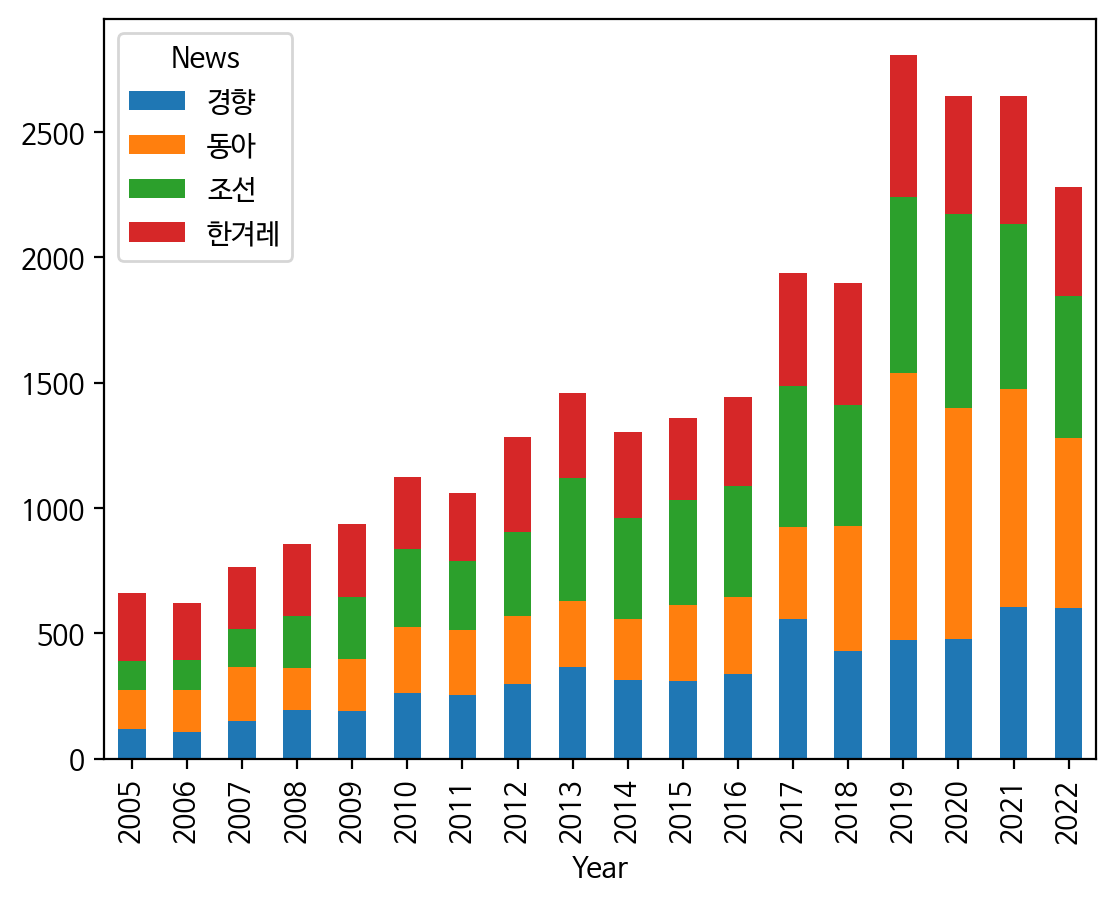

In [ ]:
# 신문사별 기사 개수 추이 확인하기

df1.groupby('News').Year.value_counts().unstack(0).plot.bar(stacked = True);

<Figure size 1200x1000 with 0 Axes>

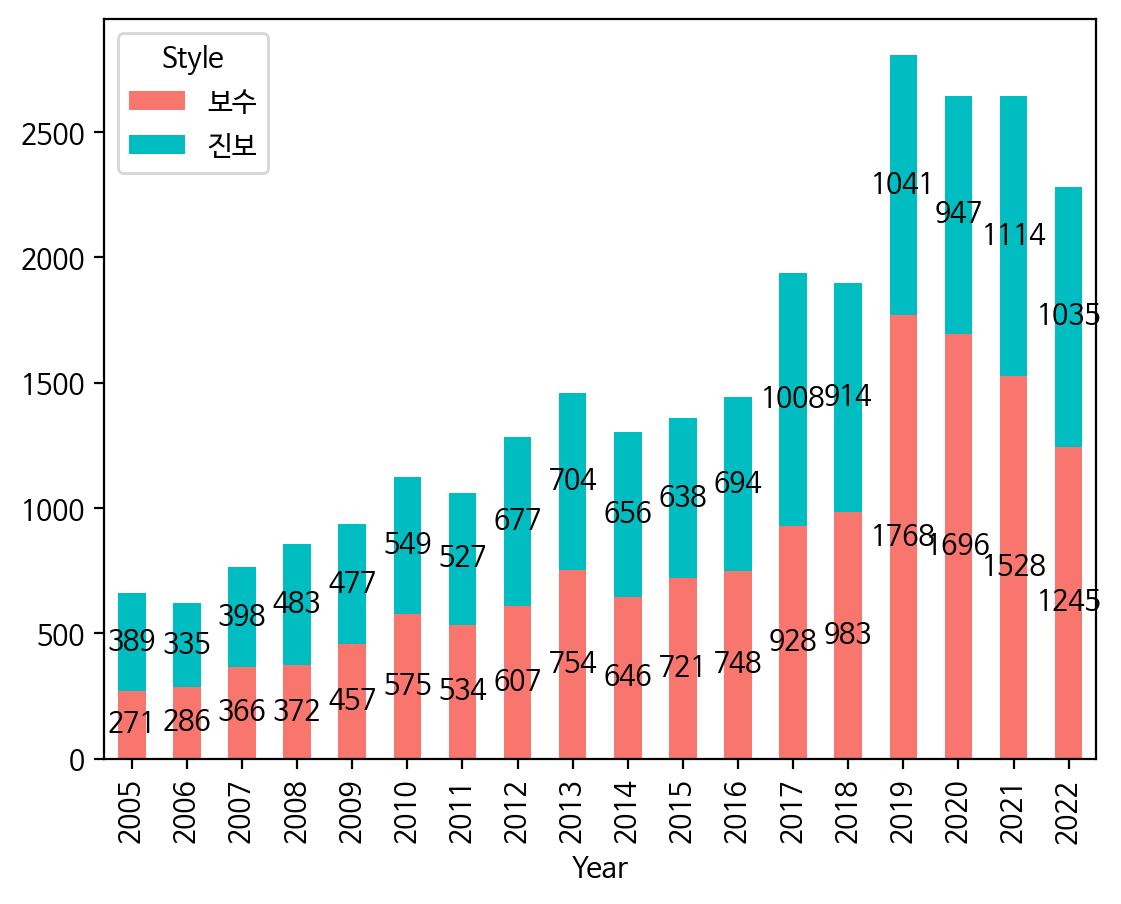

In [ ]:
# 신문사 성향별+연도별로 묶어서 개수 확인
grouped = df1.groupby('Style').Year.value_counts().unstack(0)

# 그림 사이즈 및 색상 설정
plt.figure(figsize=(12, 10))
ax = grouped.plot(kind='bar', stacked=True, color=['#F8766D', '#00BDC2'])

# 데이터값 라벨링하기
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center')

plt.show();